Блокнот к вопросу https://ru.stackoverflow.com/questions/1294279/


In [1]:
import scipy.io as io
import scipy as sp
import scipy.fft as fft
import scipy.signal as signal

import matplotlib.pyplot as plt
import numpy as np

In [2]:
ecg_list = []

Электрокардиограмма из набора https://data.mendeley.com/datasets/7dybx7wyfn/3

Кардиограмма состоит из 10 последовательных неперекрывающихся наборов, снятых с частотой 360 Гц. В каждом файле 3600 замеров, всего 36000 замеров.

In [3]:
for i in range(10):
    mat = io.loadmat('./MLII/1 NSR/100m (0).mat')
    ecg_list.append(mat["val"].flatten())

In [4]:
ecg = np.concatenate(ecg_list)


In [5]:
ecg.shape

(36000,)

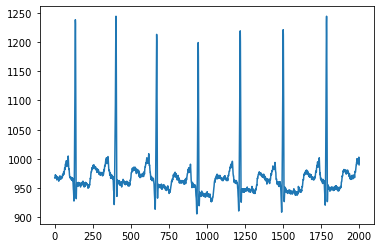

In [6]:
plt.plot(ecg[2000:4000])

**Построение спектра средствами периодограммы**

Периодограмма в простейшем виде - квадрат модуля амплитуды преобразования Фурье

In [7]:
freqs, psd = signal.periodogram(ecg, fs=360)

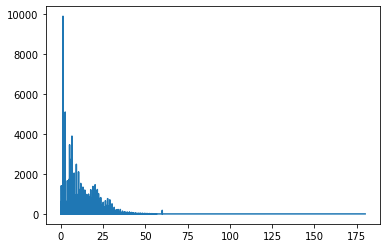

In [8]:
plt.plot(freqs, psd)

Диапазон частот менее 4 Гц (т.е. процессы с частотой не более 240 сокращений в минуту)

In [9]:
low_freqs = freqs[freqs < 4.0]
psd_low_freqs = psd[:len(low_freqs)]

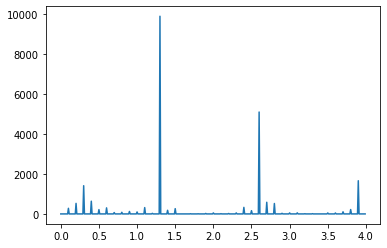

In [10]:
plt.plot(low_freqs, psd_low_freqs)

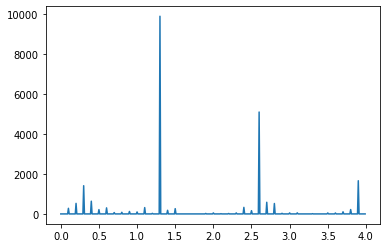

In [11]:
psd_low_freqs[psd_low_freqs < 10.0] = 0.0
plt.plot(low_freqs, psd_low_freqs)

Частота с максимальной амплитудой

In [12]:
freqs[np.argmax(psd)]

1.3

3 частоты с максимальными амплитудами

In [13]:
idx = np.argsort(psd_low_freqs)
idx_most = idx[-3:]
low_freqs[idx_most], psd_low_freqs[idx_most]

(array([3.9, 2.6, 1.3]),
 array([1662.1819, 5103.5654, 9900.397 ], dtype=float32))

**Построение спектра средствами быстрого преобразования Фурье**

In [14]:
fft_data = np.abs(np.fft.fft(ecg))


Удаление нулевой частоты - постоянной части сигнала.

In [15]:
fft_data[0] = np.nan

Функция `numpy.fft.fft` возвращает значения для дискретного набора частот. Для заданного числа замеров частоты возвращает функция `fftfreq`. Второй параметр задаёт время дискретизации, интервал в секундах между смежными замерами.

In [16]:
time_step = 1 / 360
freqs = np.fft.fftfreq(len(ecg), time_step)


Удаление частот менее 4 Гц.

Так как спектр получился симметричным, отрицательные частоты отброшены.

Text(0, 0.5, 'Амплитуда')

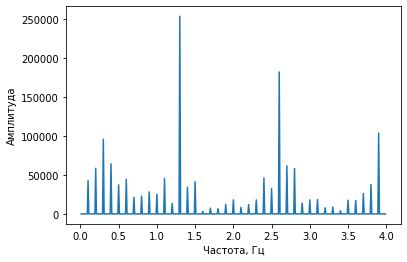

In [17]:
idx = np.argsort(freqs)
idx_4Hz = idx[np.abs(freqs[idx]) < 4.0]
idx_4Hz = idx_4Hz[freqs[idx_4Hz] > 0]
plt.plot(freqs[idx_4Hz], fft_data[idx_4Hz])
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")

Частоты с максимальными амплитудами

In [18]:
idx_max = idx_4Hz[fft_data[idx_4Hz] > 1e5]

In [19]:
freqs[idx_max]

array([1.3, 2.6, 3.9])

Пульс соответствует сигналу с частотой 1.3 Гц. Частоты 2.6 и 3.9 Гц - это обертона, старшие гармоники, соответствующие основной частоте.

In [20]:
freqs[idx_max[0]]*60

78.0